In [2]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import csv

In [3]:
pwd

'/home/jovyan/team_84/notebooks/20201231'

In [63]:
assessment = pd.read_csv("../20210101/ethnicity_new.csv")
enrollment = pd.read_csv("../20210101/total_enrollment_per_race_with_districtcode.csv")
assessment.head()

assessment_lit = assessment[assessment["Test Id"] == 1]
assessment_math = assessment[assessment["Test Id"] == 2]

In [64]:
assessment_math.head()

,County Code,District Code,Subgroup ID,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
0,1,10017,78,2,2431.30,80.0,80.0,51.0,16.0,16.0,0.0,0.0,0.0,1.0,15.0
2,1,10017,74,2,2403.70,92.0,92.0,72.0,22.0,22.0,0.0,0.0,0.0,0.0,22.0
4,3,10033,80,2,2470.05,595.0,595.0,57.0,53.0,53.0,0.0,7.0,7.0,15.0,31.0
7,4,10041,78,2,2492.20,357.0,357.0,20.0,17.0,17.0,0.0,1.0,1.0,3.0,13.0
8,4,10041,80,2,2473.30,707.0,707.0,70.0,67.0,67.0,2.0,2.0,4.0,19.0,44.0


In [13]:
#Converting all the assessment columns from percentage columns to absolute numbers for exceeded, met,met & above, nearly met, not met

# assessment.head()
# assessment['Total Standard Exceeeded'] =(assessment['Students Tested']*assessment['Percentage Standard Exceeded']/100).round(decimals=0)
# assessment['Total Standard Met'] =(assessment['Students Tested']*assessment['Percentage Standard Met']/100).round(decimals=0)
# assessment['Total Standard Met and Above'] =(assessment['Students Tested']*assessment['Percentage Standard Met and Above']/100).round(decimals=0)
# assessment['Total Standard Nearly Met'] =(assessment['Students Tested']*assessment['Percentage Standard Nearly Met']/100).round(decimals=0)
# assessment['Total Standard Not Met'] =(assessment['Students Tested']*assessment['Percentage Standard Not Met']/100).round(decimals=0)
# assessment.head(40)


In [65]:
# I am only getting 902 rows for this group by districts
# Also dropping all the % columns
# Last grouped by district code

#assessment_math = assessment_math.drop(columns=['Percentage Standard Exceeded','Percentage Standard Met and Above', 'Percentage Standard Met and Above','Percentage Standard Nearly Met','Percentage Standard Not Met'])
assessment_math_by_district_df = assessment_math.groupby(['District Code']).sum()
assessment_math_by_district_df.head()
#assessment_math_by_district_df_all_races_total = assessment_math_by_district_df

,County Code,Subgroup ID,Test Id,Mean Scale Score,Total Tested At Entity Level,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met
District Code,,,,,,,,,,,,,,
10017,2,152,2,4884.500000,144.0,144.0,123.0,32.0,32.0,0.0,1.0,1.0,7.0,24.0
10033,3,80,1,2491.450000,602.0,602.0,57.0,55.0,55.0,2.0,11.0,13.0,14.0,28.0
10041,8,158,2,5068.266667,1071.0,1071.0,90.0,85.0,85.0,8.0,17.0,25.0,32.0,28.0
10058,5,80,1,2501.028571,1302.0,1302.0,201.0,186.0,186.0,24.0,51.0,75.0,63.0,48.0
10074,14,152,2,4812.200000,600.0,600.0,78.0,70.0,70.0,0.0,1.0,1.0,10.0,59.0


In [66]:
# Merging the total enrollment data and the assessment data. 
enrollment = enrollment.loc[enrollment['Agency Name'].apply(lambda x: 'OFFICE OF EDUCATION' not in x)]
enrolled_and_tested = enrollment.merge(assessment_math_by_district_df, on='District Code', how='outer')
#enrolled_and_tested.columns

In [67]:
# I created a new column with Student test % to look at how many of the students enrolled are being tested. I have also sorted on that column

enrolled_and_tested = enrolled_and_tested[['District Code','Agency Name', 'Total Enrollment','Students Tested']] 
enrolled_and_tested = enrolled_and_tested.dropna()
enrolled_and_tested['Student tested %']=enrolled_and_tested['Students Tested']/enrolled_and_tested['Total Enrollment']*100
enrolled_and_tested.sort_values(['Student tested %'])
# self notes
# enrolled_and_tested[~enrolled_and_tested["Agency Name"].str.contains("COUNTY OFFICE OF EDUCATION", regex=False)]


,District Code,Agency Name,Total Enrollment,Students Tested,Student tested %
195,68049,DEHESA ELEMENTARY,6314.0,12.0,0.190054
770,65474,SAUSALITO MARIN CITY,558.0,11.0,1.971326
486,63628,MARICOPA UNIFIED,3972.0,102.0,2.567976
576,71423,NUESTRO ELEMENTARY,490.0,13.0,2.653061
485,71407,MARCUM-ILLINOIS UNION ELEMENTARY,2415.0,67.0,2.774327
417,63966,LAKESIDE UNION ELEMENTARY,6313.0,183.0,2.898780
372,68163,JULIAN UNION ELEMENTARY,4360.0,127.0,2.912844
79,69112,BLOCHMAN UNION ELEMENTARY,1277.0,61.0,4.776821
3,75309,ACTON-AGUA DULCE UNIFIED,10000.0,584.0,5.840000
927,64204,WESTWOOD UNIFIED,346.0,26.0,7.514451


In [68]:
enrolled_and_tested_more_than_100_percent = enrolled_and_tested[enrolled_and_tested['Student tested %'] > 100]
enrolled_and_tested_less_than_100_percent = enrolled_and_tested[enrolled_and_tested['Student tested %'] < 100]


In [70]:
enrolled_and_tested_more_than_100_percent

,District Code,Agency Name,Total Enrollment,Students Tested,Student tested %
345,69211,HOPE ELEMENTARY,255.0,519.0,203.529412
375,70045,JUNCTION ELEMENTARY,24.0,128.0,533.333333
398,71142,KNIGHTS FERRY ELEMENTARY,0.0,12.0,inf
544,64816,MOUNTAIN VIEW ELEMENTARY,2558.0,4444.0,173.729476
587,66613,OCEAN VIEW,2641.0,5556.0,210.374858
871,67892,TRONA JOINT UNIFIED,0.0,50.0,inf


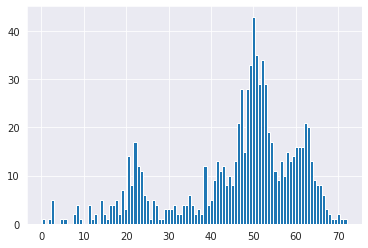

In [73]:
plt.hist(enrolled_and_tested_less_than_100_percent['Student tested %'], bins=100);

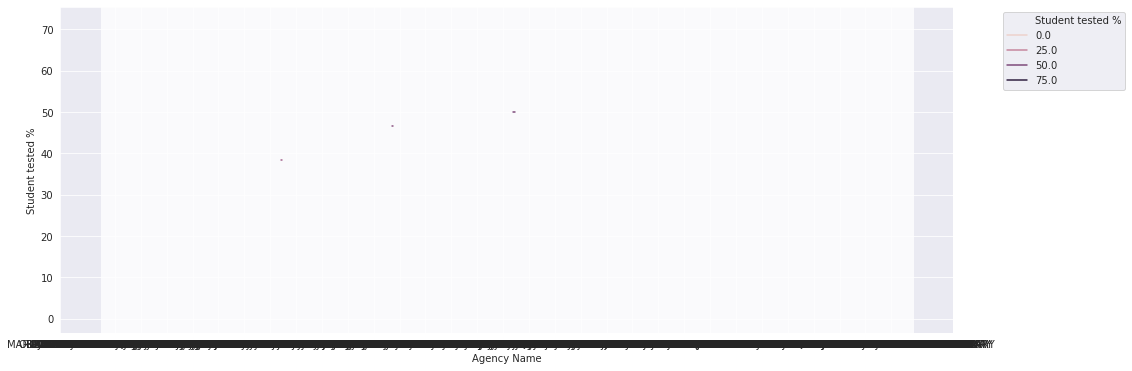

In [75]:
#enrolled_and_tested.plot()
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
sns.lineplot(data = enrolled_and_tested_less_than_100_percent, x="Agency Name", y="Student tested %", hue="Student tested %")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.show()
